### Аналитика в авиакомпании

In [56]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
#импорт данных
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

In [58]:
#осмотр данных
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [59]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [60]:
city_flights


,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


In [61]:
city_flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [62]:
city_flights.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


**Вывод: наборы данных достаточнго малы, никаких аномалии в типах данных нет**

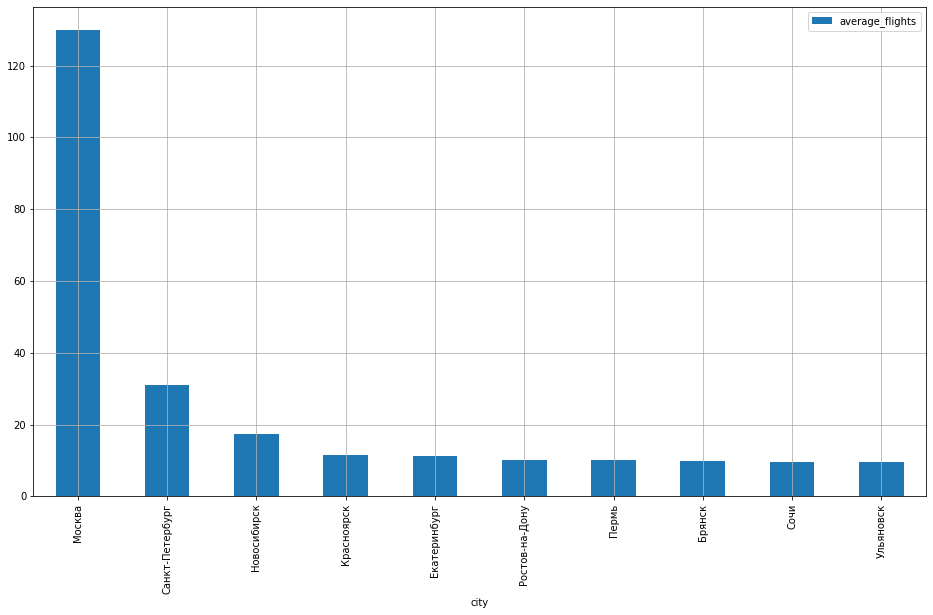

In [63]:
# Выберем топ-10 городов по количеству рейсов
(
city_flights
    .sort_values(by = 'average_flights', ascending = False)
    .head(10)
    .plot(x = 'city', y= 'average_flights', kind = 'bar',figsize = (16,9), grid = True)
                                                                                 )
plt.show()

**Вывод: ожидаемо, Москва в лидерах на несколько раз, затем СПб, затем НСК.**

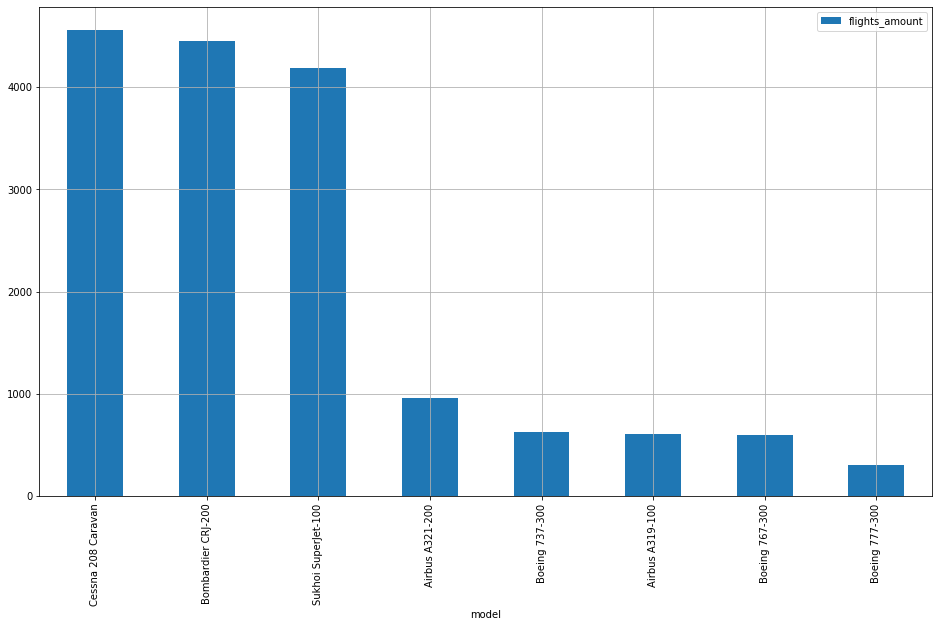

In [64]:
#Построим графики зависимости моеди самолетов от количества рейсов
(
model_flights
    .sort_values(by = 'flights_amount', ascending = False)
    .plot(x = 'model', y= 'flights_amount', kind = 'bar',figsize = (16,9), grid = True)
 )
plt.show()


**Мы имееи трех явных лидеров, Cessna 208 Caravan , Bombardier CRJ-200 и Sukhoi Superjet-100.**

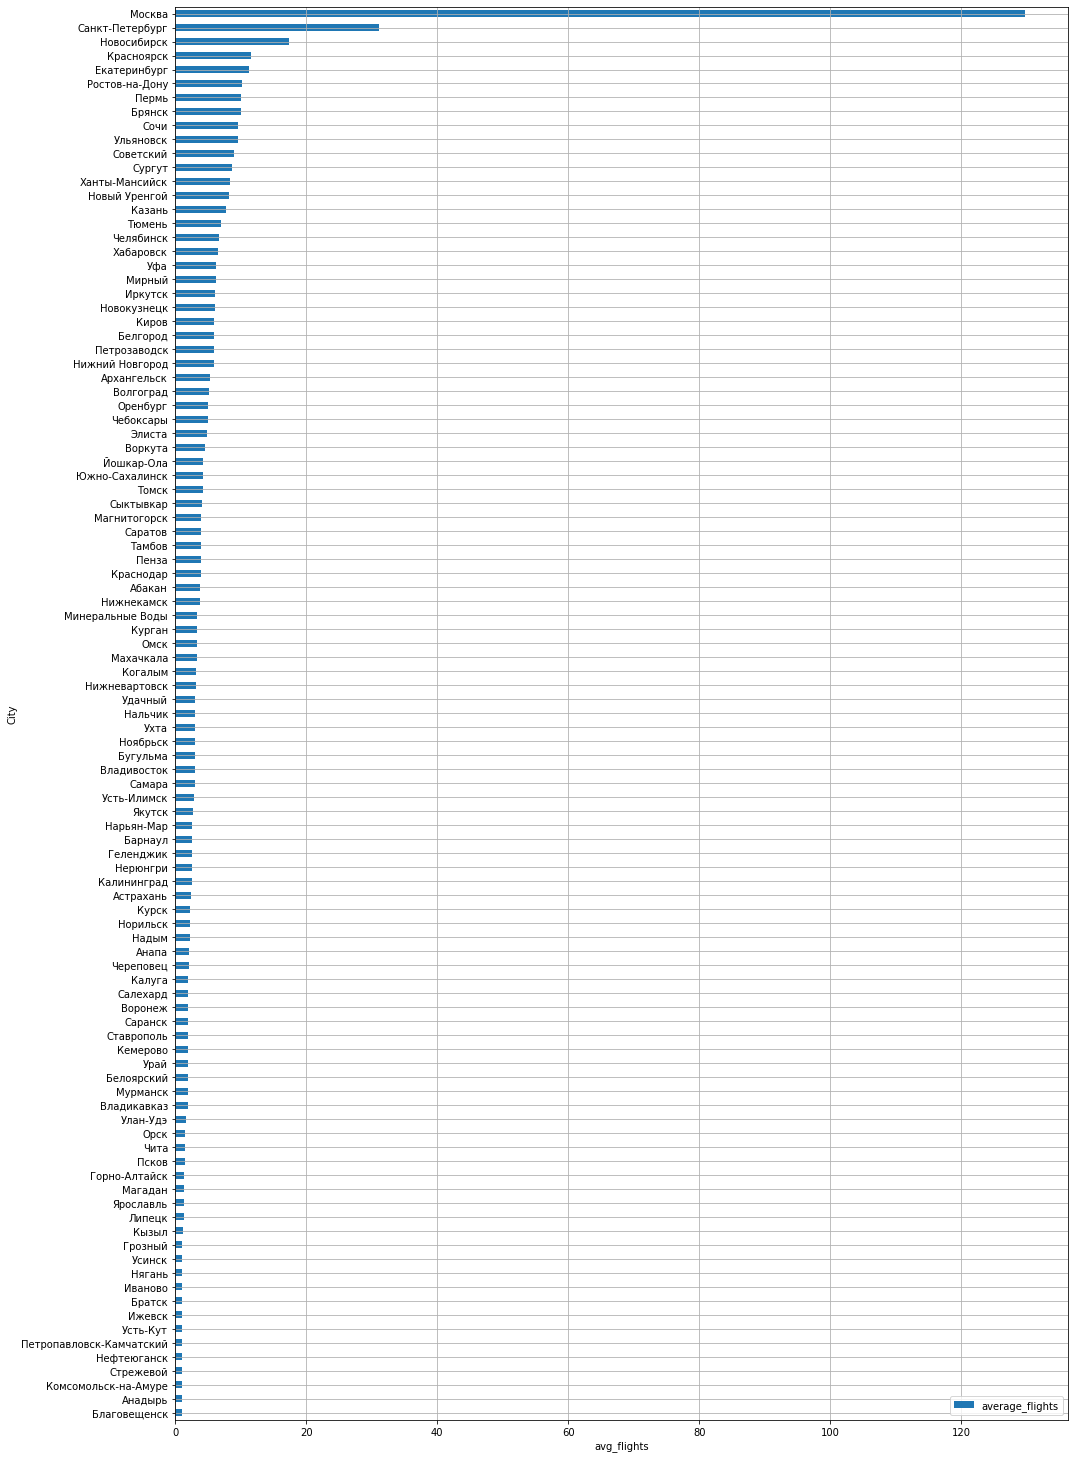

In [67]:
#Построим графики зависимости города и количества рейсов

fig, ax = plt.subplots(figsize=(16,26))
(city_flights
    .sort_values(by = 'average_flights', ascending = True)
    .plot(x = 'city', y= 'average_flights', kind = 'barh', grid = True, ax=ax)
)
ax.set_xlabel('avg_flights')
ax.set_ylabel('City')

plt.show()

**Стоит проверить, если сложить ср. рейсов всех городов, смогут ли они обогнать Москву?**



### Проверка гипотезы средствами Python

In [ ]:
# Загрузим датасет
data_flight_fest = pd.read_csv('/datasets/query_last.csv')


In [ ]:
# рассмотрим данные
data_flight_fest

In [ ]:
data_flight_fest.info()

In [ ]:
# Заменим формат festival_week, чтобы не отображать ноль после запятой
data_flight_fest.festival_week = data_flight_fest.festival_week.astype(object)

In [68]:
#проверка
data_flight_fest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null object
festival_name    3 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


### Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

«Средний спрос на билеты во время фестивалей равен  среднему спросу на билеты в обычное время». - нулевая гипотеза.  
«Средний спрос на билеты во время фестивалей отличается  среднему спросу на билеты в обычное время». - альтернативная гипотеза.  

Сделаем это потому, что нулевая гипотеза принимается, как правило об возможности равенства средних двух генеральных совокупностей. Уровень критической значимости примем за 0,05


In [ ]:
# сделаем выборку по полетам в фестивали
festtime = data_flight_fest.query('~festival_week.isna()')[['ticket_amount']]


In [ ]:
# сделаем выборку по полетам не в фестивали
nofesttime = data_flight_fest.query('festival_week.isna()')[['ticket_amount']]

In [ ]:
print('Среднее билетов в неделю фестов',festtime.mean() )
print()
print('Среднее билетов в неделю без фестов',nofesttime.mean() )

In [ ]:
#установим удобный формат вывода чисел
pd.options.display.float_format = '{: .2f}'.format

In [69]:
# Зададим критический уровень статистической значимости, прмем его за распространенный 0,05
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    festtime, 
    nofesttime, equal_var = False)

# выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.37743249]
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средне количество рейсов за неделю с вероятностью в почти 4% может быть получено  случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним количеством полетов в неделю во время фестивалей или без них.



Мы провели исследование, выгрузили необходимую информацию из базы данных посредством инструментов SQL, решили поставленные задачи и сделали следующие выводы:

### Вывод
1. Москва безоговорочный лидер по количеству рейсов в день, далее с большим отрывом СПб и МСК. 
2. По модлям самолетов тройка лидеров Cessna 208 Caravan , Bombardier CRJ-200 и Sukhoi Superjet-100.
3. Время проведения фестивалей не влияет на количество рейсов.

